In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
# %cd /gdrive

In [ ]:
!pip install MulticoreTSNE

In [ ]:
%cd '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction'

/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction


In [ ]:
import h5py
import numpy as np
from sklearn import datasets
import hdf5datasetwriter
import os

In [ ]:
# !mkdir ./dog_cat_ori

In [ ]:
# !unzip -j '/content/gdrive/My Drive/Exercise/ AdMLDL/Asg1/dog_cat.zip' -d '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat_ori'

In [ ]:
# !mkdir ./dog_cat

In [ ]:
# os.listdir()

In [ ]:
# %cd '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat_ori'
# !ls -1 | wc -l

/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat_ori


In [ ]:
# !mkdir ../dog_cat/dog
# !mkdir ../dog_cat/cat

In [ ]:
# !mv dog.* ../dog_cat/dog
# !mv cat.* ../dog_cat/cat

In [ ]:
# check the number of images about dog
%cd '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat/dog'
!ls -1 | wc -l

/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat/dog
2500


In [ ]:
# check the number of images about cat
%cd '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat/cat'
!ls -1 | wc -l

/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/dog_cat/cat
2500


In [ ]:
%cd '/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction'

/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction


In [ ]:
# !rm -rf ./features.hdf5

In [ ]:
# extract features of images by ResNet50 with dataset from dog_cat folder, output is saved in features.hdf5
!python extract_features.py --dataset ./dog_cat --output ./features.hdf5

In [ ]:
f = h5py.File('/content/gdrive/My Drive/ JVN/Visualization/Feature Extraction/features.hdf5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [ ]:
# check elements in file 'features.hdf5'
list(f.keys())

['features', 'label_names', 'labels']

In [ ]:
# check length of each feature vector
# when we use ResNet50 (ResNet with 50 layers), we have the length of each feature vector = 2048*7*7 = 100352
f['features'][1].shape # this shows the length of feature vector [1] = 100352

(100352,)

In [ ]:
# check the number of unique values in each feature vector
len(np.unique(f['features'][1], return_counts=True)[1]) # this shows the number
# of unique values for feature vector [1] = 13825

13825

In [ ]:
# show the unique values and the number of each value respectively
np.unique(f['features'][1], return_counts=True) # this shows the unique values and the number
# of unique values for feature vector [1]

(array([0.00000000e+00, 1.87635422e-04, 2.91155680e-04, ...,
        3.25772438e+01, 3.39091225e+01, 3.43554497e+01]),
 array([79757,     1,     1, ...,     1,     1,     1]))

In [ ]:
## We can use sklearn library to import TSNE but the program run slowly
# from sklearn.manifold import TSNE
# f_embedded = TSNE(n_components=2).fit_transform(f['features'])

In [ ]:
# Use MulticoreTSNE to process data, reference in 'https://github.com/DmitryUlyanov/Multicore-TSNE'
from MulticoreTSNE import MulticoreTSNE as TSNE
f_embedded = TSNE(n_jobs=2).fit_transform(f['features'])

In [ ]:
# show feature vectors after processing by TSNE
f_embedded

array([[ 12.39875924,   6.39209741],
       [-13.48606945,   5.16803361],
       [ 18.89458804,   1.93408466],
       ...,
       [ -6.03354969,   0.5692464 ],
       [-17.72868211,  14.16230081],
       [-13.14570055,   2.53860722]])

In [ ]:
# check shape of feature vectors processed
f_embedded.shape

(5000, 2)

In [ ]:
# make a matrix including feature vectors processed and labels
features_by_tsne = np.insert(f_embedded, 2, f['labels'][:], axis=1)

In [ ]:
# save data to file
from numpy import save
save('features_by_tsne.npy', features_by_tsne)

In [ ]:
# use seaborn library to plot data
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("mako_r", 2) # the number '2' used if data has 2 features

In [ ]:
# load data
data = np.load('./features_by_tsne.npy')

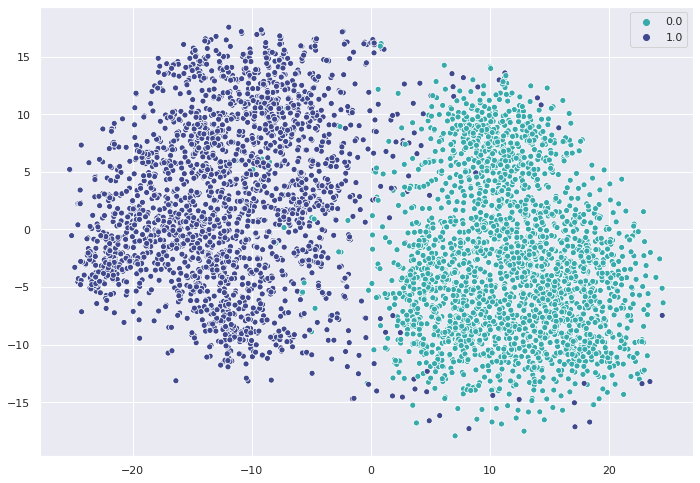

In [ ]:
# plot feature vectors
sns_plot = sns.scatterplot(data[:,0], data[:,1], hue=data[:,2], legend='full', palette=palette)

After using ResNet50 to get feature vectors of images, processing feature vectors by tsne and plot data, we can see almost features of dog and cat are seperated to 2 parts, but sometimes the features of them can be confused, the feature of cat can be in dog class and vice versa.

In [ ]:
# save plot
figure = sns_plot.get_figure()
figure.savefig("visualize_feature_vectors.png")